- This dataset comprises thin section images of 19 different rocks and minerals sourced from various locations. It is ideal for both research and educational purposes. The dataset provides ample material for training and understanding petrology within the realm of data science. Once you've developed a satisfactory model, you can use any preferred framework to expand the classes and data further.

- In this guide, I'll introduce you to some state-of-the-art deep learning models using FastAI and PyTorch. While I assume you're working within the Kaggle environment, if you're running the code locally, you'll need to adjust the data import sections slightly, but the rest of the instructions will remain the same.

- Note: I do not own these datasets. As a geoscience enthusiast with limited knowledge about these images, I have compiled them from various sources. Most of the data are from open-source websites as of the time I collected them. For research or academic purposes, there shouldn't be any issues using this data. However, for commercial use, I'm uncertain about the permissions and suggest further verification.

- You can find the data in the following link https://www.kaggle.com/code/prateekvyas/petronet-with-fastai-and-pytorch/notebook?select=test

In [30]:

#! pip install tensorflow 

In [35]:
# Import packages 
import pandas as pd 
import matplotlib.pyplot as plt
import numpy as np 
###
import os 
from PIL import Image
import pathlib

import tensorflow as tf

from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.models import Sequential


from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout
from tensorflow.keras.optimizers import Adam



## Prepare the Data

In [37]:
# Set the directories to train and test and validate 
train_dir = r"C:\Users\khair\Downloads\archive (2)\train"
test_dir = r"C:\Users\khair\Downloads\archive (2)\test"
validation_dir = r"C:\Users\khair\Downloads\archive (2)\validation"

In [ ]:
# rescale data fro train test valid datasets 
#By specifying rescale=1.0/255.0, you are effectively normalizing the pixel values to the range [0, 1].
# Example: A pixel value of 255 (white) will become 255 * 1.0/255.0 = 1.0. A pixel value of 128 (mid-gray) will become 128 * 1.0/255.0 ≈ 0.502.
datagen = ImageDataGenerator(rescale = 1.0/255.0)  

# Create data generator for training data
#flow_from_directory():
#This method generates batches of data from the images found in a specified directory. 
# It is particularly useful for loading large datasets that do not fit into memory.
train_generator = datagen.flow_from_directory(
    train_dir,
    target_size=(224, 224),
    batch_size=32,
    class_mode='categorical'
)

# Create data generator for tesing data
test_generator = datagen.flow_from_directory(
    test_dir,
    target_size=(224, 224),
    batch_size=32,
    class_mode='categorical'
)

# Create data generator for validation data
# Create data generator for training data
validation_generator = datagen.flow_from_directory(
    validation_dir,
    target_size=(224, 224),
    batch_size=32,
    class_mode='categorical'
)

Found 17427 images belonging to 19 classes.
Found 2200 images belonging to 19 classes.
Found 2033 images belonging to 19 classes.


- The Dataset in the code above is ready to build the model 

## Build the model 

In [ ]:
# During this project We will try to build a simple CNN model before proceeeding with any other model, 
# We will probably need to do some adjustments or using transfer learning to improve the performance of the model 
# Define the CNN model
model = Sequential([
    Conv2D(32, (3, 3), activation='relu', input_shape=(224, 224, 3)),
    MaxPooling2D((2, 2)),
    Conv2D(64, (3, 3), activation='relu'),
    MaxPooling2D((2, 2)),
    Conv2D(128, (3, 3), activation='relu'),
    MaxPooling2D((2, 2)),
    Flatten(),
    Dense(512, activation='relu'),
    Dropout(0.5),
    Dense(train_generator.num_classes, activation='softmax')
])

# Compile the model
model.compile(optimizer=Adam(),
              loss='categorical_crossentropy',
              metrics=['accuracy'])

# Print the model summary
model.summary()


c:\Users\khair\anaconda3\envs\thin_s\lib\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 222, 222, 32)   │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 111, 111, 32)   │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 109, 109, 64)   │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 54, 54, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_2 (Conv2D)               │ (None, 52, 52, 128)    │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_2 (MaxPooling2D)  │ (None, 26, 26, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 86528)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 512)            │    44,302,848 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 512)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 19)             │         9,747 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 44,405,843 (169.39 MB)

 Trainable params: 44,405,843 (169.39 MB)

 Non-trainable params: 0 (0.00 B)

## Train the model 

In [40]:
# Train the model
history = model.fit(
    train_generator,
    epochs=10,
    validation_data=validation_generator
)


c:\Users\khair\anaconda3\envs\thin_s\lib\site-packages\keras\src\trainers\data_adapters\py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


Epoch 1/10
545/545 ━━━━━━━━━━━━━━━━━━━━ 2233s 4s/step - accuracy: 0.5668 - loss: 1.2988 - val_accuracy: 0.9075 - val_loss: 0.2650
Epoch 2/10
545/545 ━━━━━━━━━━━━━━━━━━━━ 9140s 17s/step - accuracy: 0.8914 - loss: 0.2984 - val_accuracy: 0.9587 - val_loss: 0.1370
Epoch 3/10
545/545 ━━━━━━━━━━━━━━━━━━━━ 20033s 37s/step - accuracy: 0.9351 - loss: 0.1791 - val_accuracy: 0.9459 - val_loss: 0.1149
Epoch 4/10
545/545 ━━━━━━━━━━━━━━━━━━━━ 20281s 37s/step - accuracy: 0.9608 - loss: 0.1025 - val_accuracy: 0.9621 - val_loss: 0.1106
Epoch 5/10
545/545 ━━━━━━━━━━━━━━━━━━━━ 1257s 2s/step - accuracy: 0.9758 - loss: 0.0707 - val_accuracy: 0.8515 - val_loss: 0.3966
Epoch 6/10
545/545 ━━━━━━━━━━━━━━━━━━━━ 1556s 3s/step - accuracy: 0.9587 - loss: 0.1250 - val_accuracy: 0.9547 - val_loss: 0.1308
Epoch 7/10
545/545 ━━━━━━━━━━━━━━━━━━━━ 1502s 3s/step - accuracy: 0.9813 - loss: 0.0609 - val_accuracy: 0.9690 - val_loss: 0.1245
Epoch 8/10
545/545 ━━━━━━━━━━━━━━━━━━━━ 2286s 4s/step - accuracy: 0.9830 - loss: 0.05

In [41]:
# Evaluate the model on the test set
loss, accuracy = model.evaluate(test_generator)
print(f'Test Loss: {loss}')
print(f'Test Accuracy: {accuracy}')


69/69 ━━━━━━━━━━━━━━━━━━━━ 60s 872ms/step - accuracy: 0.9388 - loss: 0.2380
Test Loss: 0.22509410977363586
Test Accuracy: 0.9422727227210999


In [45]:
#! pip install tensorflow scikit-learn


In [48]:
from sklearn.metrics import confusion_matrix, classification_report

# Predict the classes for your test set
test_labels = test_generator.classes
pred_labels = model.predict(test_generator)
pred_labels = pred_labels.argmax(axis=1)

# Generate confusion matrix
cm = confusion_matrix(test_labels, pred_labels)

cm



69/69 ━━━━━━━━━━━━━━━━━━━━ 71s 1s/step


array([[  0,   0,   2,   0,   2,   1,   0,   0,   2,   0,   1,   0,   0,
          0,   0,   0,   0,   6,   0],
       [  1,   2,   9,   4,   7,   2,   0,   1,  15,  22,   2,   0,   0,
          1,   0,   1,   1,  22,   0],
       [  1,  13,  16,   5,  13,   6,   1,   2,  47,  31,  11,   0,   0,
          2,   1,   1,   1,  38,   1],
       [  3,   4,   7,   0,   3,   2,   0,   1,  19,  18,   1,   0,   1,
          0,   0,   0,   1,  19,   1],
       [  0,   6,   5,   1,  20,   4,   0,   2,  20,  31,   1,   0,   0,
          0,   1,   0,   1,  32,   1],
       [  1,   1,   4,   3,   7,   0,   0,   1,  20,  20,   4,   1,   1,
          0,   1,   0,   0,  21,   0],
       [  0,   1,   1,   0,   0,   0,   0,   0,   1,   1,   0,   0,   0,
          0,   0,   0,   0,   0,   0],
       [  0,   1,   3,   1,   0,   4,   0,   1,   5,   1,   0,   0,   1,
          1,   0,   0,   1,   6,   0],
       [  2,  26,  34,   8,  52,  19,   2,   8, 116,  81,  19,   3,   5,
          4,   2,   2,   6, 110

In [50]:
# Classification report
print(classification_report(test_labels, pred_labels))

              precision    recall  f1-score   support

           0       0.00      0.00      0.00        14
           1       0.02      0.02      0.02        90
           2       0.09      0.08      0.09       190
           3       0.00      0.00      0.00        80
           4       0.11      0.16      0.13       125
           5       0.00      0.00      0.00        85
           6       0.00      0.00      0.00         4
           7       0.04      0.04      0.04        25
           8       0.23      0.23      0.23       500
           9       0.18      0.18      0.18       400
          10       0.03      0.03      0.03        86
          11       0.00      0.00      0.00        16
          12       0.00      0.00      0.00        17
          13       0.07      0.06      0.06        16
          14       0.00      0.00      0.00        10
          15       0.00      0.00      0.00         9
          16       0.00      0.00      0.00        20
          17       0.23    

- Depending on the matrix classification the model should be overfitting with .16 accuracy, low f1-scorevalues (~zero with some classes),the same low values with precision and recall  values

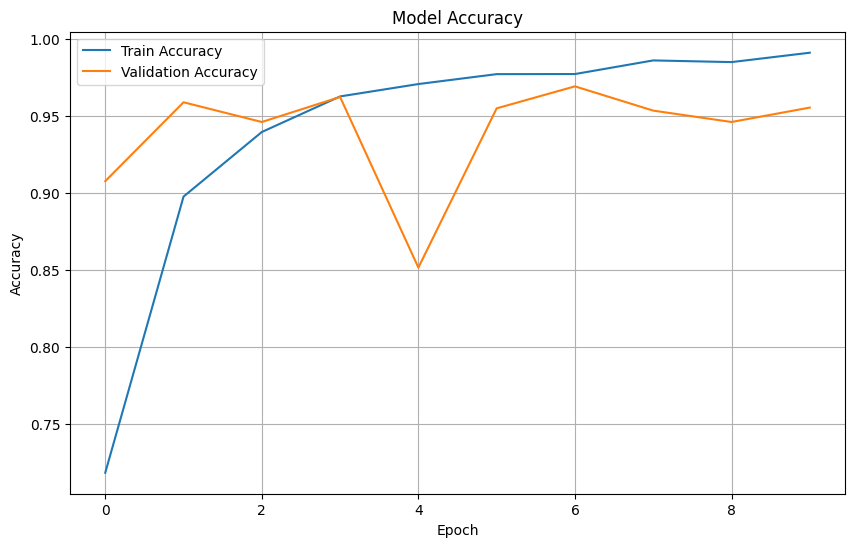

In [51]:
# Plotting training & validation accuracy values
plt.figure(figsize=(10, 6))
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Model Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend(loc='upper left')
plt.grid(True)
plt.show()


The illustration you uploaded is a line graph comparing the training accuracy (blue line) and validation accuracy (orange line) of a machine learning model over 10 epochs.

Here's what the graph tells us:

The training accuracy steadily increases and reaches nearly 1.0 by the 4th epoch, maintaining high accuracy throughout the remaining epochs.

The validation accuracy initially increases but fluctuates, showing a significant drop at the 4th epoch. It then recovers and fluctuates again, but does not reach the high level of the training accuracy.

Interpreting the Overfitting Issue:

The model is showing signs of overfitting. Overfitting occurs when the model performs exceptionally well on the training data but poorly on the validation data, indicating that the model has memorized the training data, including noise and outliers, and does not generalize well to new, unseen data.

- To adjust the model I will add Regularization techniques to the model and see what is gonna happen L2

## b- Model with L2 Regularization

In [55]:
# During this project We will try to build a simple CNN model before proceeding with any other model, 
# We will probably need to do some adjustments or use transfer learning to improve the performance of the model 

from tensorflow.keras.regularizers import l2


# Define the CNN model
model_2= Sequential([
    Conv2D(32, (3, 3), activation='relu', input_shape=(224, 224, 3), kernel_regularizer=l2(0.001)),
    MaxPooling2D((2, 2)),
    Conv2D(64, (3, 3), activation='relu', kernel_regularizer=l2(0.001)),
    MaxPooling2D((2, 2)),
    Conv2D(128, (3, 3), activation='relu', kernel_regularizer=l2(0.001)),
    MaxPooling2D((2, 2)),
    Flatten(),
    Dense(512, activation='relu', kernel_regularizer=l2(0.001)),
    Dropout(0.5),
    Dense(train_generator.num_classes, activation='softmax')
])

# Compile the model
model_2.compile(optimizer=Adam(),
              loss='categorical_crossentropy',
              metrics=['accuracy'])

# Print the model summary
model_2.summary()


c:\Users\khair\anaconda3\envs\thin_s\lib\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_6 (Conv2D)               │ (None, 222, 222, 32)   │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_6 (MaxPooling2D)  │ (None, 111, 111, 32)   │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_7 (Conv2D)               │ (None, 109, 109, 64)   │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_7 (MaxPooling2D)  │ (None, 54, 54, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_8 (Conv2D)               │ (None, 52, 52, 128)    │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_8 (MaxPooling2D)  │ (None, 26, 26, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_2 (Flatten)             │ (None, 86528)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_4 (Dense)                 │ (None, 512)            │    44,302,848 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_2 (Dropout)             │ (None, 512)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_5 (Dense)                 │ (None, 19)             │         9,747 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 44,405,843 (169.39 MB)

 Trainable params: 44,405,843 (169.39 MB)

 Non-trainable params: 0 (0.00 B)

In [ ]:
# Train the model
history_2 = model_2.fit(
    train_generator,
    epochs=10,
    validation_data=validation_generator
)


Epoch 1/10
 27/545 ━━━━━━━━━━━━━━━━━━━━ 25:57 3s/step - accuracy: 0.1727 - loss: 4.8932

In [ ]:
# Evaluate the model on the test set
loss_2, accuracy_2 = model_2.evaluate(test_generator)
print(f'Test Loss: {loss_2}')
print(f'Test Accuracy: {accuracy_2}')

In [52]:
###############################################################################################################

In [32]:



def thin_sesction_images(folder):
    images = []
    for filename in os.listdir(folder):
        img_path = os.path.join(folder, filename)
        if img_path.endswith('.jpg') or img_path.endswith('.png'):
            img = Image.open(img_path)
            img = img.resize((224, 224))  # Resize image
            img_array = np.array(img)
            images.append(img_array)
    return np.array(images)

# image dataset path( train Data)
folder_path = r'C:\Users\khair\Downloads\archive (2)\train\plagioclase'
images = thin_sesction_images(folder_path)
print(f"Loaded {len(images)} images")


Loaded 90 images


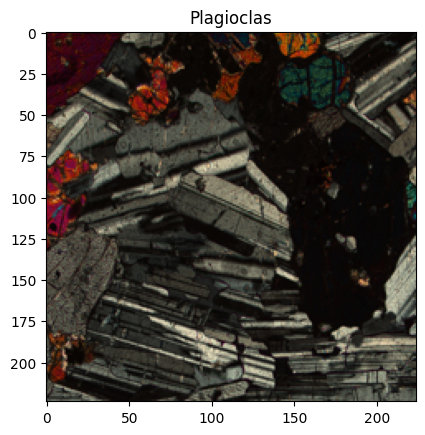

In [33]:
## Display image 

def display_image(image,title=None):
    plt.imshow(image)
    
    if title:
        plt.title(title)
    plt.show()

display_image(images[3],title="Plagioclas")